# Evaluación 2 parte 1

**Integrantes:**

+ Integrante 1: Juan Diego Arévalo Durán : juan.arevalo2101@alumnos.ubiobio.cl
+ Integrante 2: Matías Rodrigo Muñoz Silva  : matias.munoz2201@alumnos.ubiobio.cl
+ Integrante 3: Matías Ignacio Vilches Bravo : matias.vilches2201@alumnos.ubiobio.cl

**Fecha de Entrega:** 15 de Mayo 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 de la asignatura de Inteligencia Artificial de la carrera Ingeniería Civil en Informática de la Universidad del Biío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- Pandas (2.2.2)
- Numpy (2.0.2)
- Matplotlib (3.10.0)
- Seaborn (0.13.2)
- Scipy (1.15.2)


In [16]:
#INGRESO DE LIBRERIAS
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
import seaborn as sb
print(sb.__version__)
import pickle

import sklearn
print(sklearn.__version__)
#INGRESO DE LIBRERIAS ESPECIFICAS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

2.2.2
2.0.2
3.10.0
0.13.2
1.6.1


In [17]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv

--2025-05-11 00:05:09--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510280 (498K) [text/plain]
Saving to: ‘dataset_regresion.csv.3’

dataset_regresion.c 100%[===================>] 498.32K  --.-KB/s    in 0.05s   

2025-05-11 00:05:09 (9.68 MB/s) - ‘dataset_regresion.csv.3’ saved [510280/510280]



In [18]:
# **
# Leer el archivo dataset_regresion.csv
#
data = pd.read_csv("dataset_regresion.csv", sep=",")

# Descripción del negocio

✅ **Nombre del negocio:** PeopleGrow Solutions

✅ **Industria:** Consultoría de desarrollo organizacional y gestión de talento

✅ **Objetivo del negocio:** Optimizar las estrategias de compensación salarial para mejorar la retención del talento y la satisfacción laboral, considerando múltiples factores del perfil de los empleados.

**Antecedentes**

PeopleGrow Solutions trabaja con empresas que buscan alinear sus políticas salariales con indicadores clave como nivel educativo, experiencia laboral, satisfacción de los empleados y modalidad de trabajo (presencial/remoto). La empresa ha recolectado datos sobre empleados de distintas áreas para entender qué factores están más fuertemente asociados con la variación en los salarios mensuales.

# Objetivo del proyecto

Desarrollar un modelo de regresión que permita predecir el salario mensual de un empleado, basándose en perfil educativo, experiencia laboral, nivel de satisfacción, características del puesto y otras variables disponibles dentro del set de datos

Esto permitirá:

✅ Identificar brechas salariales entre departamentos o niveles educativos.

✅ Diseñar políticas de compensación equitativas y competitivas.

✅ Detectar factores críticos que contribuyen a una mayor remuneración.

✅ Simular escenarios de promoción o cambio de modalidad de trabajo y su impacto salarial.

# Pregunta clave

Esta pregunta debe encontrar la respuesta en la fase 2 de entendimiento de los datos

✔ ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

# Fase 2 - Entendimiento de los datos

In [ ]:
# Obtener la cantidad de filas y columnas (observaciones y características de los datos)
data.shape

(10000, 9)

---
✅ **Interpretación**

---

+ Se encuestó a 10000 trabajadores
+ Cada trabajador tienen 9 caracteristicas

In [ ]:
# Nombre de las columnas
data.columns

Index(['ID', 'Edad', 'Nivel_Educativo', 'Experiencia_Anios', 'Departamento',
       'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral', 'Remoto',
       'Salario_Mensual'],
      dtype='object')

---
✅ **Interpretación**

---


+ ID: Identificador único de los trabajadores
+ Edad: Edad de cada trabajador
+ Nivel_educativo: Nivel de estudio de cada trabajador
+ Experiencia_anios: Es la cantididad de años de experiencia de cada trabajador
+ Departamento: Área de trabajo de cada empleado
+ Horas_Entrenamiento_Mensual: Horas que entrena el empleado para su cargo
+ Satisfacción_Laboral: Nivel de satisfacción del empleado
+ Remoto: Indica si el empleado trabaja de forma remota
+ Salario_Mensual: Es el salario mensual en dolares de cada empleado


In [ ]:
# Obtiene las primeras 5 observaciones
data.head()


,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual
0,1,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50
1,2,46,Universitaria,23,TI,17,Muy Alta,No,6375.40
2,3,32,Técnica,13,TI,8,Media,No,4883.02
3,4,60,Secundaria,37,Finanzas,7,Alta,No,6739.09
4,5,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60


In [ ]:

# Obtiene detalles de las columnas (características de los diamantes)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Edad                         10000 non-null  int64  
 2   Nivel_Educativo              10000 non-null  object 
 3   Experiencia_Anios            10000 non-null  int64  
 4   Departamento                 10000 non-null  object 
 5   Horas_Entrenamiento_Mensual  10000 non-null  int64  
 6   Satisfaccion_Laboral         10000 non-null  object 
 7   Remoto                       10000 non-null  object 
 8   Salario_Mensual              10000 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 703.3+ KB


In [ ]:
# Obtiene la cantidad de regostros con valores nulos
data.isna().sum()

ID                             0
Edad                           0
Nivel_Educativo                0
Experiencia_Anios              0
Departamento                   0
Horas_Entrenamiento_Mensual    0
Satisfaccion_Laboral           0
Remoto                         0
Salario_Mensual                0
dtype: int64

In [ ]:

# Usaremos un método resumen de estadísticas numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,5000.500000,2886.895680,1.00,2500.7500,5000.500,7500.2500,10000.00
Edad,10000.0,41.557600,13.749581,18.00,30.0000,41.500,53.0000,65.00
Experiencia_Anios,10000.0,20.461600,13.239760,0.00,9.0000,20.000,32.0000,40.00
Horas_Entrenamiento_Mensual,10000.0,10.000000,3.183711,0.00,8.0000,10.000,12.0000,23.00
Salario_Mensual,10000.0,5764.693974,1659.896370,1773.68,4364.3675,5788.975,7177.2925,9641.94


In [ ]:
# obtenemos la correlacion de las variables respecto a el salario mensual(Nuestra variable objetivo la cual pretendemos predecir)
corr_matrix = data[data.describe().columns].corr()
corr_matrix["Salario_Mensual"].sort_values(ascending=False)

Salario_Mensual                1.000000
Experiencia_Anios              0.954013
Edad                           0.943406
Horas_Entrenamiento_Mensual    0.014064
ID                            -0.005383
Name: Salario_Mensual, dtype: float64

In [ ]:
# Obtiene registros que incumplen con reglas naturales del negocio
data.query('Edad<18 or Salario_Mensual==0 or Horas_Entrenamiento_Mensual<0')

,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual


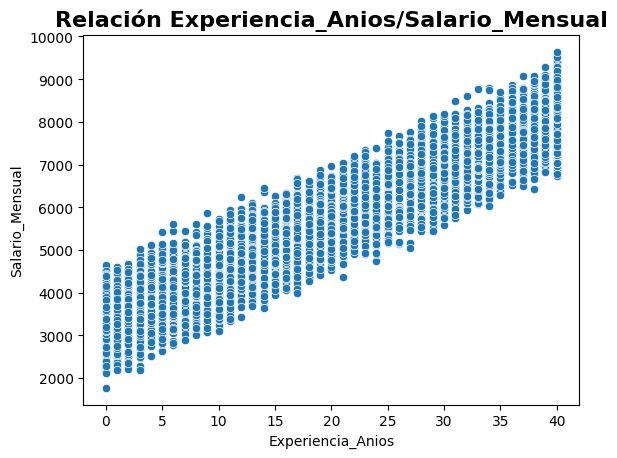

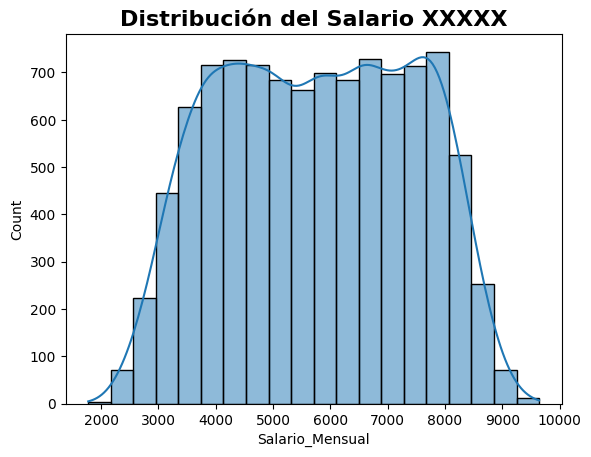

In [ ]:
# Diagrama de dispersión de la variable Salario_Mensual respecto a la variable Experiencia_Anios
sb.scatterplot(x=data.Experiencia_Anios , y=data.Salario_Mensual)
plt.title("Relación Experiencia_Anios/Salario_Mensual", fontsize=16, fontweight="bold")
plt.show()

# Histograma de la variable Salario_Mensual
sb.histplot(data.Salario_Mensual, bins=20, kde=True)
plt.title("Distribución del Salario XXXXX", fontsize=16, fontweight="bold")
plt.show()

# Fase 3 - Preparación de los datos

In [23]:

# Obtiene las columnas a codificar
categorical_features = data.describe(include = np.object_).columns
# Usamos LabelEncoder
le = LabelEncoder()
for feature in categorical_features:
  data[f'{feature}_codificado'] = le.fit_transform(data[feature])
data.head()

,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual,Nivel_Educativo_codificado,Departamento_codificado,Satisfaccion_Laboral_codificado,Remoto_codificado
0,1,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50,3,1,0,1
1,2,46,Universitaria,23,TI,17,Muy Alta,No,6375.40,3,3,3,0
2,3,32,Técnica,13,TI,8,Media,No,4883.02,2,3,2,0
3,4,60,Secundaria,37,Finanzas,7,Alta,No,6739.09,1,0,0,0
4,5,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60,3,1,0,1


In [24]:


# Separa variables independientes de la dependiente
X = data.drop(["Salario_Mensual"], axis=1)
X.head()


,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Nivel_Educativo_codificado,Departamento_codificado,Satisfaccion_Laboral_codificado,Remoto_codificado
0,1,56,Universitaria,38,Marketing,11,Alta,Sí,3,1,0,1
1,2,46,Universitaria,23,TI,17,Muy Alta,No,3,3,3,0
2,3,32,Técnica,13,TI,8,Media,No,2,3,2,0
3,4,60,Secundaria,37,Finanzas,7,Alta,No,1,0,0,0
4,5,25,Universitaria,7,Marketing,8,Alta,Sí,3,1,0,1


In [26]:
y = data["Salario_Mensual"]
y.head()

,Salario_Mensual
0,8230.50
1,6375.40
2,4883.02
3,6739.09
4,4729.60


In [27]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=29)

# Fase 4 - Modelamiento

## Considerando la totalidad de características disponibles

## Con selección de características por parte del equipo

# Fase 5 - Evaluación

## Carga de archivo JSON con datos completamente nuevos

## Generación de JSON con las predicciones del mejor modelo